# DATA SCIENCE INTERN @CODERSCAVE 
# Author : Tuhin Nath Phase 2 Project :  Email Spam Detection





**Import the necessary libraries**

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**Read the data**

In [71]:
df = pd.read_csv(r"D:\Coders cave\task\mail spam detection\spam.csv", encoding='latin1')


In [72]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


**Data Exploration**

In [73]:
df.shape

(5572, 5)

In [74]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)


In [75]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [77]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [78]:
new_column_names = {"v1":"Email_Category","v2":"Message"}
df.rename(columns = new_column_names,inplace = True)

In [79]:
df.head()

,Email_Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [80]:
df.isnull().sum()

Email_Category    0
Message           0
dtype: int64

In [81]:
df.shape

(5572, 2)

In [102]:
df.duplicated().sum()

403

In [103]:
df.describe()

,Category
count,5572.000000
mean,0.865937
std,0.340751
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


**Necessary things to do for the rest classification**

In [104]:
df.loc[df["Email_Category"] == "spam", "Email_Category"] = 0
df.loc[df["Email_Category"] == "ham", "Email_Category"] = 1

df.head()

,Email_Category,Message,Category
0,1,"Go until jurong point, crazy.. Available only ...",1.0
1,1,Ok lar... Joking wif u oni...,1.0
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,0.0
3,1,U dun say so early hor... U c already then say...,1.0
4,1,"Nah I don't think he goes to usf, he lives aro...",1.0


In [105]:
X = df["Message"]
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [106]:
Y = df["Email_Category"]
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Email_Category, Length: 5572, dtype: object

**Split the data into training and testing sets**


In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test , Y_train , Y_test = train_test_split(X,Y, test_size = 0.2 , random_state=0)

In [108]:
X_train

1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... ÌÏ v ma fan...
3320                               Yo im right by yo work
                              ...                        
4931                Match started.india  &lt;#&gt;  for 2
3264    44 7732584351, Do you want a New Nokia 3510i c...
1653    I was at bugis juz now wat... But now i'm walk...
2607    :-) yeah! Lol. Luckily i didn't have a starrin...
2732    How dare you stupid. I wont tell anything to y...
Name: Message, Length: 4457, dtype: object

In [109]:
Y_train

1114    1
3589    1
3095    1
1012    1
3320    1
       ..
4931    1
3264    0
1653    1
2607    1
2732    1
Name: Email_Category, Length: 4457, dtype: object

**Create a TF-IDF vectorizer to convert text messages into numerical features**

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [116]:
feature_extraction = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [117]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [118]:
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")

In [115]:
X_train

1114    No no:)this is kallis home ground.amla home to...
3589    I am in escape theatre now. . Going to watch K...
3095    We walked from my moms. Right on stagwood pass...
1012       I dunno they close oredi not... ÌÏ v ma fan...
3320                               Yo im right by yo work
                              ...                        
4931                Match started.india  &lt;#&gt;  for 2
3264    44 7732584351, Do you want a New Nokia 3510i c...
1653    I was at bugis juz now wat... But now i'm walk...
2607    :-) yeah! Lol. Luckily i didn't have a starrin...
2732    How dare you stupid. I wont tell anything to y...
Name: Message, Length: 4457, dtype: object

In [120]:
print(X_train_features)

  (0, 2400)	0.42251087562056844
  (0, 6643)	0.310713090556495
  (0, 890)	0.4431414936624499
  (0, 3102)	0.4078732191722945
  (0, 3308)	0.4607061502580205
  (0, 3697)	0.38724260113041314
  (1, 4285)	0.3619488551509563
  (1, 3709)	0.49218179847458676
  (1, 7020)	0.3597932878999011
  (1, 3022)	0.2656832920063487
  (1, 6479)	0.46190436338926344
  (1, 2530)	0.46190436338926344
  (2, 3109)	0.15859116597265116
  (2, 4045)	0.15859116597265116
  (2, 777)	0.24853230530973786
  (2, 3267)	0.3059351024463395
  (2, 6904)	0.3323889186374277
  (2, 3867)	0.22778533625897432
  (2, 7140)	0.3323889186374277
  (2, 4836)	0.2640067957824946
  (2, 6113)	0.3323889186374277
  (2, 5497)	0.39905624733507106
  (2, 4344)	0.29741887579744203
  (2, 6985)	0.3059351024463395
  (3, 2642)	0.4893788451570101
  :	:
  (4454, 5637)	0.25666584238764617
  (4454, 1470)	0.30396107829387736
  (4454, 2095)	0.24269967159421676
  (4454, 7019)	0.2053843287832964
  (4454, 3827)	0.23135590834159414
  (4454, 1497)	0.23226820104119308
  

**LOGISTIC REGRESSION ALGORITHM**

In [122]:
from sklearn.linear_model import LogisticRegression

In [123]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [133]:
from sklearn.metrics import accuracy_score

predict = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, predict)  

print(model.score(X_train_features, Y_train))
print('accuracy on the test data is : ', accuracy_on_training_data)

0.9699349338119811
accuracy on the test data is :  0.9699349338119811


**Test the model with some custom email messages**

In [137]:
input_your_mail = ["Important update: Your account has been locked for security reasons."]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
print(prediction)
if (prediction)[0] == 1:
  print("Ham Mail")
else:
  print("Spam Mail")

[1]
Ham Mail


In [139]:
input_your_mail = ["Congratulations! You've won a free vacation."]
input_data_features = feature_extraction.transform(input_your_mail)
prediction = model.predict(input_data_features)
print(prediction)

if (prediction)[0] == 1:
  print("Ham Mail")
else:
  print("Spam Mail")

[0]
Spam Mail


**Data visualization**

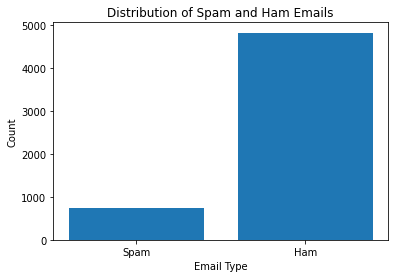

In [151]:
spam_count = df[df['Category'] == 0].shape[0]
ham_count = df[df['Category'] == 1].shape[0]

plt.bar(['Spam', 'Ham'], [spam_count, ham_count])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Ham Emails')
plt.show()

In [159]:
import nltk


In [160]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [162]:
from collections import Counter


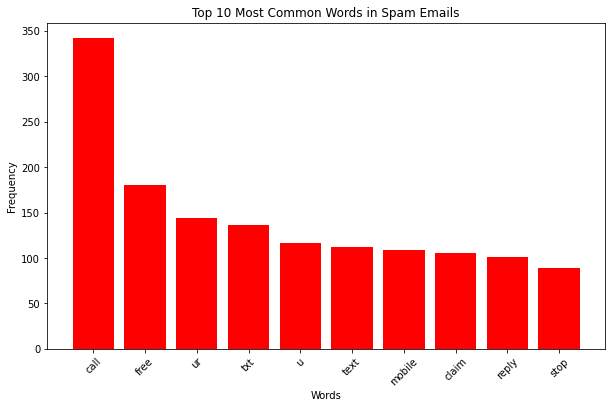

In [163]:
stop_words = set(stopwords.words('english'))
spam_words = " ".join(df[df['Category'] == 0]['Message']).split()
ham_words = " ".join(df[df['Category'] == 1]['Message']).split()

spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(10)), color='r')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()

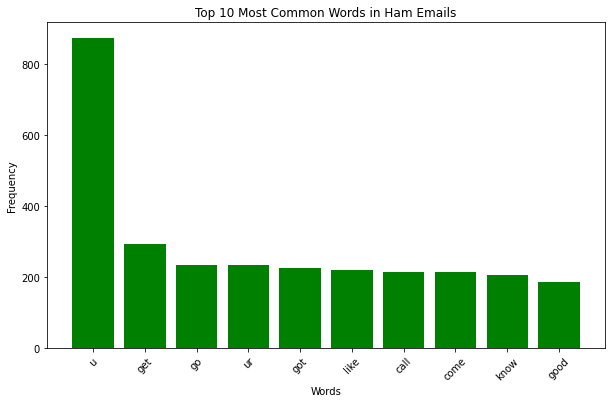

In [164]:

ham_word_freq = Counter([word.lower() for word in ham_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*ham_word_freq.most_common(10)), color='g')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Common Words in Ham Emails')
plt.xticks(rotation=45)
plt.show()


# Thank You!